In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors


In [4]:
!unzip -q "/content/new-plant-diseases-dataset.zip"

In [10]:
import cv2
import os
def load_images_from_folder1(folder):
    images = []
    image_id = []
    for filename in os.listdir(folder):
        #print(filename)
        img = cv2.imread(os.path.join(folder,filename))
        img = cv2.resize(img, (224, 224))
        #img = img.astype('float32')
        #img /= 255
        if img is not None:
            images.append(img)
            image_id.append(0)
    print("All labels and images are loaded successfully Corn_Cercospora with label 0")

    return images, image_id
Corn_Cercospora_image,Corn_Cercospora_label= load_images_from_folder1('/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot')

All labels and images are loaded successfully Corn_Cercospora with label 0


In [6]:
import cv2
import os
def load_images_from_folder2(folder):
    images = []
    image_id = []
    for filename in os.listdir(folder):
        #print(filename)
        img = cv2.imread(os.path.join(folder,filename))
        img = cv2.resize(img, (224, 224))
        #img = img.astype('float32')
        #img /= 255
        if img is not None:
            images.append(img)
            image_id.append(1)
    print("All labels and images are loaded successfully Corn_common rust with label 1")

    return images, image_id
Corn_Common_Rust_image,Corn_Common_Rust_label= load_images_from_folder2('/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Corn_(maize)___Common_rust_')

All labels and images are loaded successfully Corn_common rust with label 1


In [8]:
import cv2
import os
def load_images_from_folder3(folder):
    images = []
    image_id = []
    for filename in os.listdir(folder):
        #print(filename)
        img = cv2.imread(os.path.join(folder,filename))
        img = cv2.resize(img, (224, 224))
        #img = img.astype('float32')
        #img /= 255
        if img is not None:
            images.append(img)
            image_id.append(2)
    print("All labels and images are loaded successfully CORN nORTHERN with label 2")

    return images, image_id
Corn_Leaf_Blight_image,Corn_Leaf_Blight_label= load_images_from_folder3('/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Corn_(maize)___Northern_Leaf_Blight')

All labels and images are loaded successfully CORN nORTHERN with label 2


In [9]:
import cv2
import os
def load_images_from_folder4(folder):
    images = []
    image_id = []
    for filename in os.listdir(folder):
        #print(filename)
        img = cv2.imread(os.path.join(folder,filename))
        img = cv2.resize(img, (224, 224))
        #img = img.astype('float32')
        #img /= 255
        if img is not None:
            images.append(img)
            image_id.append(3)
    print("All labels and images are loaded successfully Corn maize with label 3")

    return images, image_id
Corn_Healthy_image,Corn_Healthy_label= load_images_from_folder4('/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Corn_(maize)___healthy')

All labels and images are loaded successfully Corn maize with label 3


**Corn_(maize)___Cercospora label 6**

In [11]:
import numpy as np

Corn_Cercospora_label= np.asarray(Corn_Cercospora_label)
Corn_Common_Rust_label = np.asarray(Corn_Common_Rust_label)
Corn_Leaf_Blight_label = np.asarray(Corn_Leaf_Blight_label)
Corn_Healthy_label = np.asarray(Corn_Healthy_label)


In [12]:

Corn_Cercospora_array=np.asarray(Corn_Cercospora_image)
Corn_Common_Rust_array=np.asarray(Corn_Common_Rust_image)
Corn_Leaf_Blight_array=np.asarray(Corn_Leaf_Blight_image)
Corn_Healthy_array=np.asarray(Corn_Healthy_image)


In [13]:
Meged_image = np.concatenate((

Corn_Cercospora_array,
Corn_Common_Rust_array,
Corn_Leaf_Blight_array,
Corn_Healthy_array
), axis=0)


In [14]:
Meged_image.shape

(7316, 224, 224, 3)

In [15]:
import numpy as np
Meged_label = np.concatenate((
Corn_Cercospora_label,
Corn_Common_Rust_label,
Corn_Leaf_Blight_label,
Corn_Healthy_label
), axis=0)

'''
,
Corn_Cercospora_label,
Corn_Common_Rust_label,
Corn_Leaf_Blight_label,
Corn_Healthy_label,
Grape_black_rot_label,
Grape_Esca_label,
Grape_Leaf_blight_label,
Grape_healthy_label,
Peach_bacterial_label,
Peach_healthy_label,
Potato_Early_blight_label,
Potato_Late_blight_label,
Potato_Healthy_label,
'''

Meged_label

array([0, 0, 0, ..., 3, 3, 3])

In [16]:
#from keras.utils.np_utils import to_categorical
from tensorflow.keras.utils import to_categorical
label_final = to_categorical(Meged_label)
label_final

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

In [17]:
import sklearn.model_selection as model_selection
x_train, x_test, label_train, label_test = model_selection.train_test_split(Meged_image, label_final, test_size=0.20, random_state=42)

In [18]:
print(x_train.shape, x_test.shape, label_train.shape, label_test.shape)

(5852, 224, 224, 3) (1464, 224, 224, 3) (5852, 4) (1464, 4)


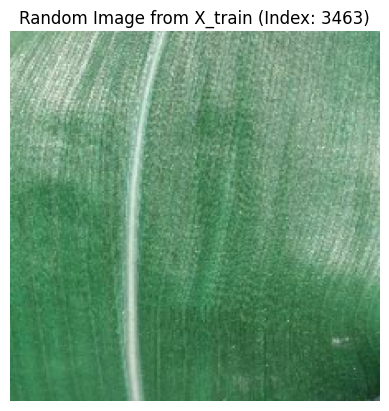

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Assume X_train is a NumPy array of shape (num_samples, height, width, channels)
# Select a random index
random_index = np.random.randint(0, x_train.shape[0])

# Extract the image
image = x_train[random_index]

# Plot the image
plt.imshow(image.astype("uint8"))  # Ensure proper data type
plt.title(f"Random Image from X_train (Index: {random_index})")
plt.axis("off")
plt.show()


In [26]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, Model
from tensorflow.keras.preprocessing import image

# Define input shape and number of classes
input_shape = (224, 224, 3)
n_classes = 4

# Use the Functional API to build the model
inputs = layers.Input(shape=input_shape)
x = layers.BatchNormalization()(inputs)
x = layers.Conv2D(32, kernel_size=(3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, kernel_size=(3, 3), activation='relu')(x)
x = layers.Conv2D(64, kernel_size=(3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(128, kernel_size=(3, 3), activation='relu')(x)
x = layers.Conv2D(128, kernel_size=(3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(256, (3, 3), activation='relu')(x)
x = layers.Conv2D(256, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(512, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(n_classes, activation='softmax')(x)

# Create the model
model_1 = Model(inputs=inputs, outputs=outputs)
model_1.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 224, 224, 3)         │              12 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 107, 107, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 53, 53, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 51, 51, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 49, 49, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 24, 24, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 22, 22, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 20, 20, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 10, 10, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 8, 8, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1024)                │       8,389,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 256)                 │         262,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 4)                   │             2

 Total params: 11,011,920 (42.01 MB)

 Trainable params: 11,011,914 (42.01 MB)

 Non-trainable params: 6 (24.00 B)

In [27]:
import keras
from keras import layers
opt = keras.optimizers.Adam(learning_rate=0.0001)
model_1.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

In [28]:
# Train the Model
history = model_1.fit(x_train, label_train,
                    validation_data=(x_test, label_test),
                    epochs=20,  # Change based on training performance
                    batch_size=32,
                    verbose=1)

Epoch 1/20
183/183 ━━━━━━━━━━━━━━━━━━━━ 56s 213ms/step - accuracy: 0.4924 - loss: 1.0214 - val_accuracy: 0.7760 - val_loss: 0.5596
Epoch 2/20
183/183 ━━━━━━━━━━━━━━━━━━━━ 51s 109ms/step - accuracy: 0.8859 - loss: 0.2998 - val_accuracy: 0.9283 - val_loss: 0.1798
Epoch 3/20
183/183 ━━━━━━━━━━━━━━━━━━━━ 20s 111ms/step - accuracy: 0.9374 - loss: 0.1733 - val_accuracy: 0.9351 - val_loss: 0.1855
Epoch 4/20
183/183 ━━━━━━━━━━━━━━━━━━━━ 21s 113ms/step - accuracy: 0.9475 - loss: 0.1540 - val_accuracy: 0.9433 - val_loss: 0.1552
Epoch 5/20
183/183 ━━━━━━━━━━━━━━━━━━━━ 19s 105ms/step - accuracy: 0.9602 - loss: 0.1190 - val_accuracy: 0.9392 - val_loss: 0.1709
Epoch 6/20
183/183 ━━━━━━━━━━━━━━━━━━━━ 19s 104ms/step - accuracy: 0.9644 - loss: 0.0998 - val_accuracy: 0.9447 - val_loss: 0.1796
Epoch 7/20
183/183 ━━━━━━━━━━━━━━━━━━━━ 20s 111ms/step - accuracy: 0.9642 - loss: 0.1002 - val_accuracy: 0.9085 - val_loss: 0.3418
Epoch 8/20
183/183 ━━━━━━━━━━━━━━━━━━━━ 19s 105ms/step - accuracy: 0.9511 - loss: 0

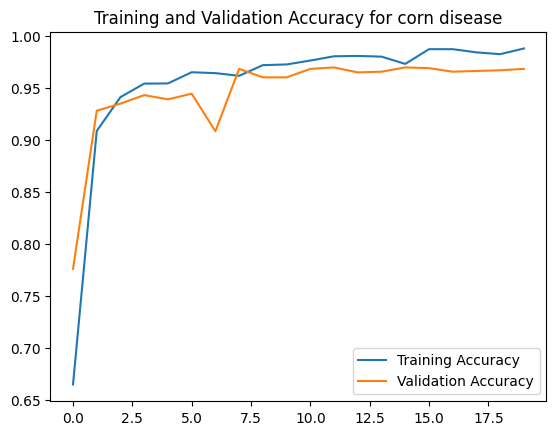

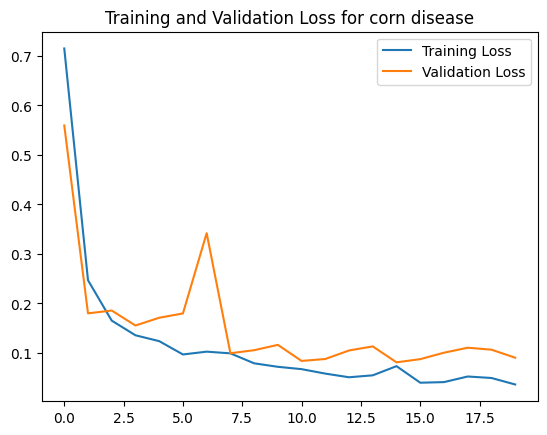

<Figure size 640x480 with 0 Axes>

In [33]:
import matplotlib.pyplot as plt
EPOCHS = 20
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
#plt.figure(figsize=(8,8))
#plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy for corn disease')
#plt.subplot(1, 2, 2)
plt.show()
plt.savefig('AccVal_acc')
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss for corn disease')
plt.show()
plt.savefig('LossVal_loss')

In [30]:
# Evaluate the model on the test set
test_loss, test_acc = model_1.evaluate(x_test, label_test, verbose=1)

print(f"Test Accuracy: {test_acc * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9683 - loss: 0.0958
Test Accuracy: 96.86%
Test Loss: 0.0901


In [31]:
from sklearn.metrics import classification_report
import numpy as np

# Get model predictions
y_pred = model_1.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert one-hot to class indices
y_true = np.argmax(label_test, axis=1)  # Convert one-hot to class indices

# Print Classification Report
print(classification_report(y_true, y_pred_classes))


46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       353
           1       0.99      0.99      0.99       376
           2       0.96      0.94      0.95       378
           3       0.99      1.00      1.00       357

    accuracy                           0.97      1464
   macro avg       0.97      0.97      0.97      1464
weighted avg       0.97      0.97      0.97      1464



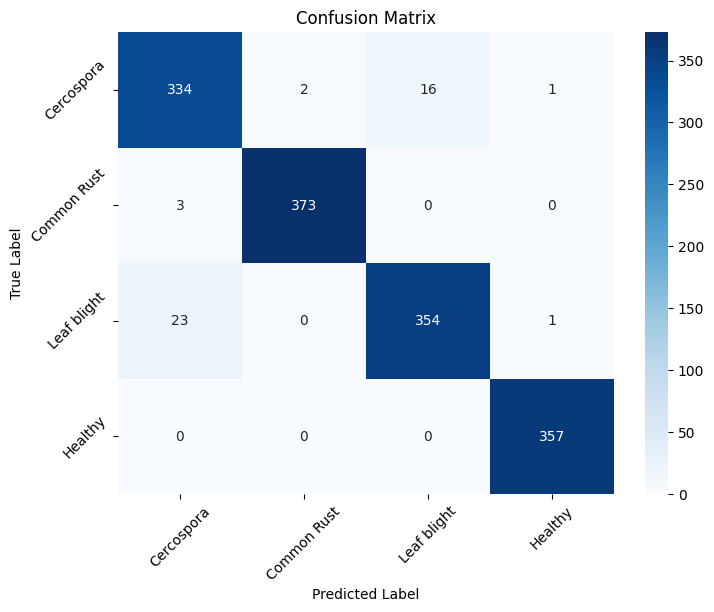

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Define class labels
class_names = ["Cercospora", "Common Rust","Leaf blight","Healthy"]  # Replace with your actual class names

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.xticks(rotation=45)  # Rotate class labels for better readability
plt.yticks(rotation=45)
plt.show()


In [35]:
# Save the model in HDF5 format
model_1.save('/content/drive/MyDrive/crop_disease_models/corn_disease_model.h5')
print("Model saved as HDF5 (.h5) format successfully!")


Model saved as HDF5 (.h5) format successfully!


In [ ]:
model_1.save('/content/drive/MyDrive/crop_disease_models/cherry_disease_model.keras')
